In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_node_disp_time(file_path):
    """
    读取节点位移结果文件并绘图：
    - 第 1 列为时间
    - 后面按节点依次为 (Ux, Uy, Uz)
    - 每个节点一行子图，每行 3 列分别为 Ux, Uy, Uz
    """

    # 读文件（忽略以 # 开头的注释行）
    data = np.loadtxt(file_path, comments='#')
    
    # 时间
    t = data[:, 0]
    
    # 判断节点数量
    n_cols = data.shape[1]
    if (n_cols - 1) % 3 != 0:
        raise ValueError("列数不是 1 + 3*N 的格式，请检查文件或 recorder 设置。")
    n_nodes = (n_cols - 1) // 3

    # 建图：n_nodes 行，3 列
    fig, axes = plt.subplots(n_nodes, 3, figsize=(12, 3 * n_nodes), sharex=True)
    
    # 兼容 n_nodes=1 的情况
    if n_nodes == 1:
        axes = np.array([axes])

    for i in range(n_nodes):
        ux = data[:, 1 + 3 * i]
        uy = data[:, 2 + 3 * i]
        uz = data[:, 3 + 3 * i]

        ax_x = axes[i, 0]
        ax_y = axes[i, 1]
        ax_z = axes[i, 2]

        ax_x.plot(t, ux)
        ax_y.plot(t, uy)
        ax_z.plot(t, uz)

        ax_x.set_ylabel(f"node {i+1} disp (m)")

        ax_x.set_title("Ux")
        ax_y.set_title("Uy")
        ax_z.set_title("Uz")

    # 统一 x 轴标签
    for j in range(3):
        axes[-1, j].set_xlabel("time")

    plt.tight_layout()
    plt.show()


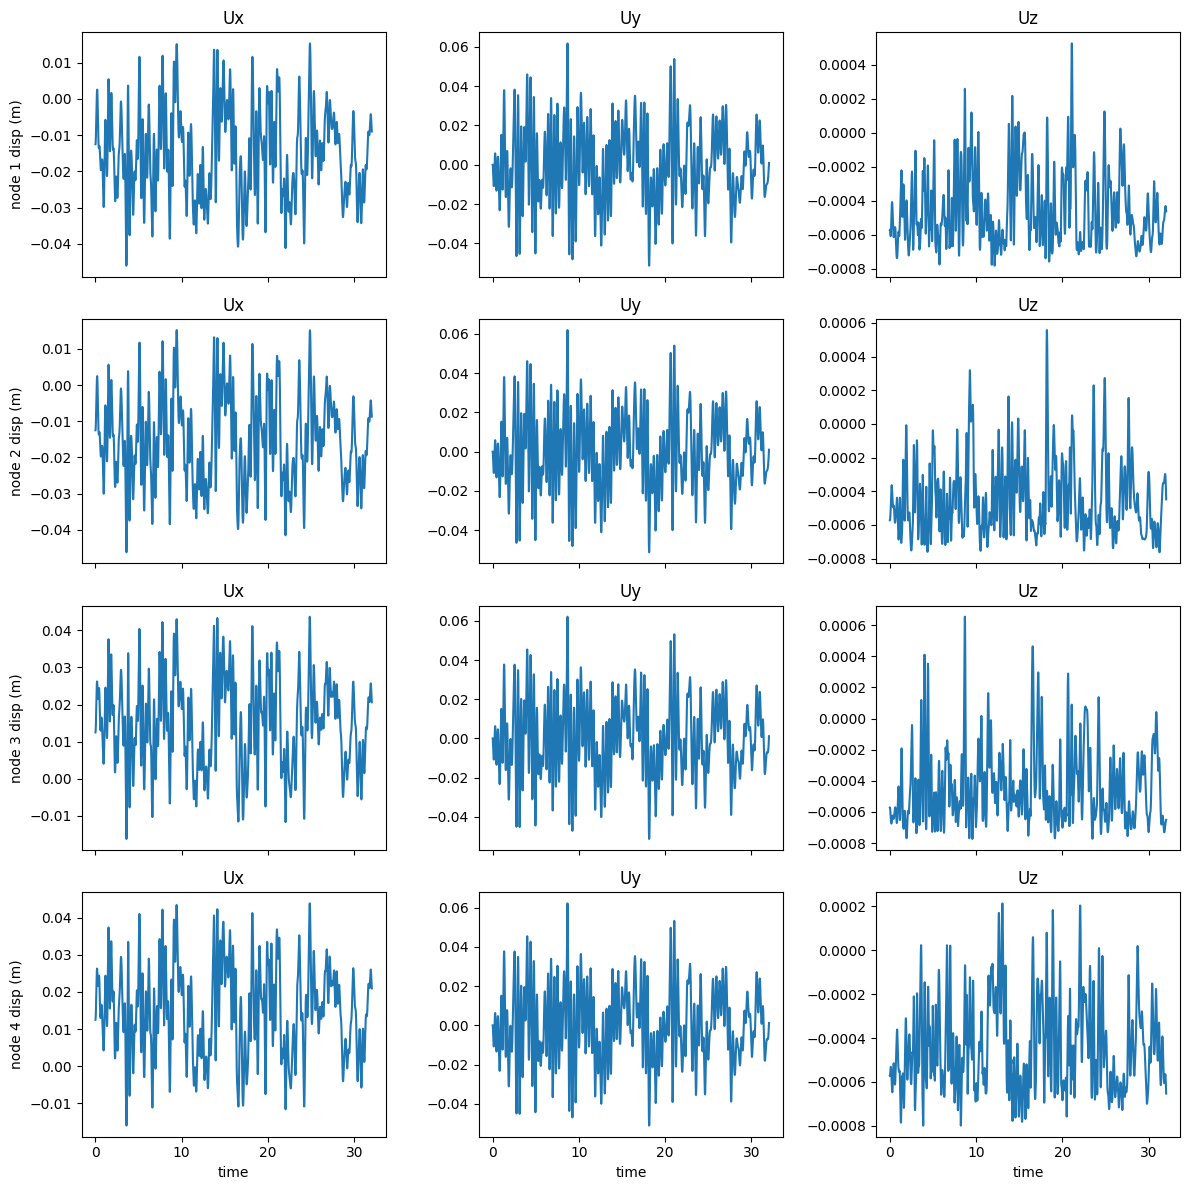

In [3]:
plot_node_disp_time(r"C:\Users\Administrator\Nutstore\1\我的坚果云\代码\活动\OpenSeespy\bridges\results\PGA_0.50g\RSN1498_CHICHI_TCU059-N\rec_pier_top_disp.out")


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_bearing_disp_time(file_deck, file_cap):
    """
    读取主梁节点和盖梁节点的位移结果文件，计算支座位移并绘图：
    - 第 1 列为时间
    - 后面按节点依次为 (Ux, Uy, Uz)
    - 支座位移 = 主梁位移 - 盖梁位移
    - 每个节点一行子图，3 列分别为 Ux, Uy, Uz
    """

    # 读文件（忽略以 # 开头的注释行）
    data_deck = np.loadtxt(file_deck, comments='#')
    data_cap  = np.loadtxt(file_cap,  comments='#')

    # 简单一致性判断
    if data_deck.shape != data_cap.shape:
        raise ValueError("主梁和盖梁结果文件维度不一致，请检查。")

    # 时间
    t = data_deck[:, 0]

    # 支座位移 = 主梁 - 盖梁
    data_rel = data_deck - data_cap
    data_rel[:, 0] = t  # 时间列保持原值

    # 判断节点数量
    n_cols = data_rel.shape[1]
    if (n_cols - 1) % 3 != 0:
        raise ValueError("列数不是 1 + 3*N 的格式，请检查 recorder 设置。")
    n_nodes = (n_cols - 1) // 3

    # 建图：n_nodes 行，3 列
    fig, axes = plt.subplots(n_nodes, 3, figsize=(12, 3 * n_nodes), sharex=True)

    # 兼容 n_nodes = 1 的情况
    if n_nodes == 1:
        axes = np.array([axes])

    for i in range(n_nodes):
        ux = data_rel[:, 1 + 3 * i]
        uy = data_rel[:, 2 + 3 * i]
        uz = data_rel[:, 3 + 3 * i]

        ax_x = axes[i, 0]
        ax_y = axes[i, 1]
        ax_z = axes[i, 2]

        ax_x.plot(t, ux)
        ax_y.plot(t, uy)
        ax_z.plot(t, uz)

        ax_x.set_ylabel(f"bearing {i+1} disp (m)")

        ax_x.set_title("Ux")
        ax_y.set_title("Uy")
        ax_z.set_title("Uz")

    for j in range(3):
        axes[-1, j].set_xlabel("time (s)")

    plt.tight_layout()
    plt.show()


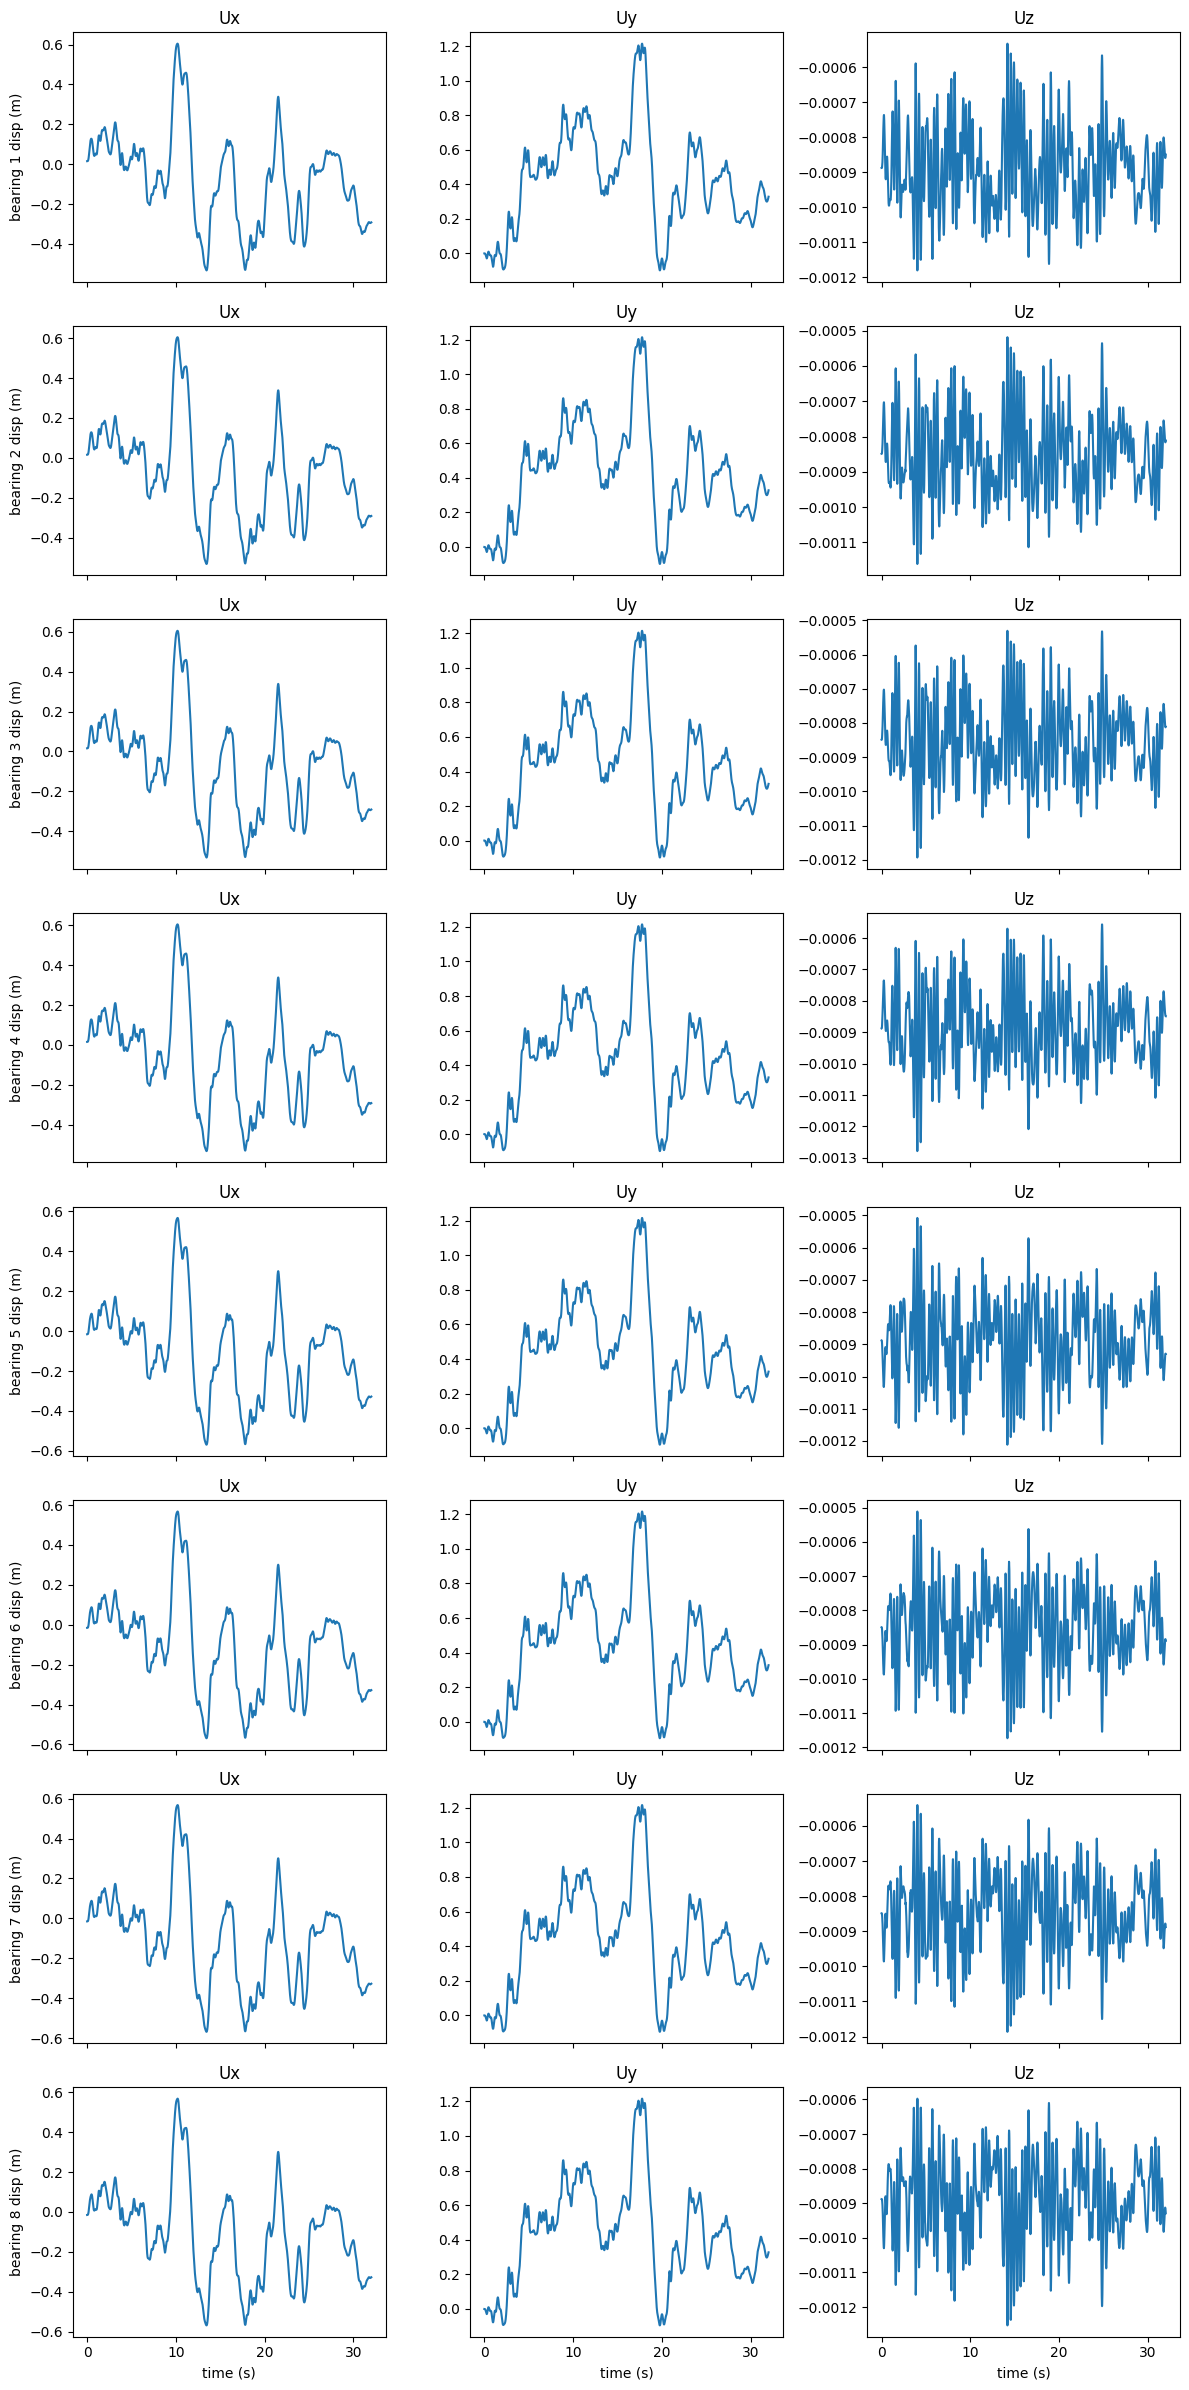

In [6]:
plot_bearing_disp_time(
   r"C:\Users\Administrator\Nutstore\1\我的坚果云\代码\活动\OpenSeespy\bridges\results\PGA_0.50g\RSN1498_CHICHI_TCU059-N\rec_bearing_deck_disp.out",
    r"C:\Users\Administrator\Nutstore\1\我的坚果云\代码\活动\OpenSeespy\bridges\results\PGA_0.50g\RSN1498_CHICHI_TCU059-N\rec_bearing_cap_disp.out"
)
